# Studio Dati COVID-19

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
pd.set_option('mode.chained_assignment', None)

Fonte Dati: https://github.com/pcm-dpc/COVID-19/tree/master/dati-json 

# Province 

Fonte Dati: https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-json/dpc-covid19-ita-province.json

In [31]:
df_province = pd.read_json('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-json/dpc-covid19-ita-province.json')

In [32]:
for i in range(len(df_province)):
    df_province['data'][i] = df_province['data'][i][0:10]
for i in range(len(df_province)):
    df_province['data'][i] = pd.to_datetime(df_province['data'][i])

## Studio Provincia di Prato

In [34]:
df_prato = df_province[df_province['denominazione_provincia'] == "Prato"]
df_prato.reset_index(inplace = True)
df_prato.drop("index", axis = 1, inplace = True)

### Funzione Cumultativa

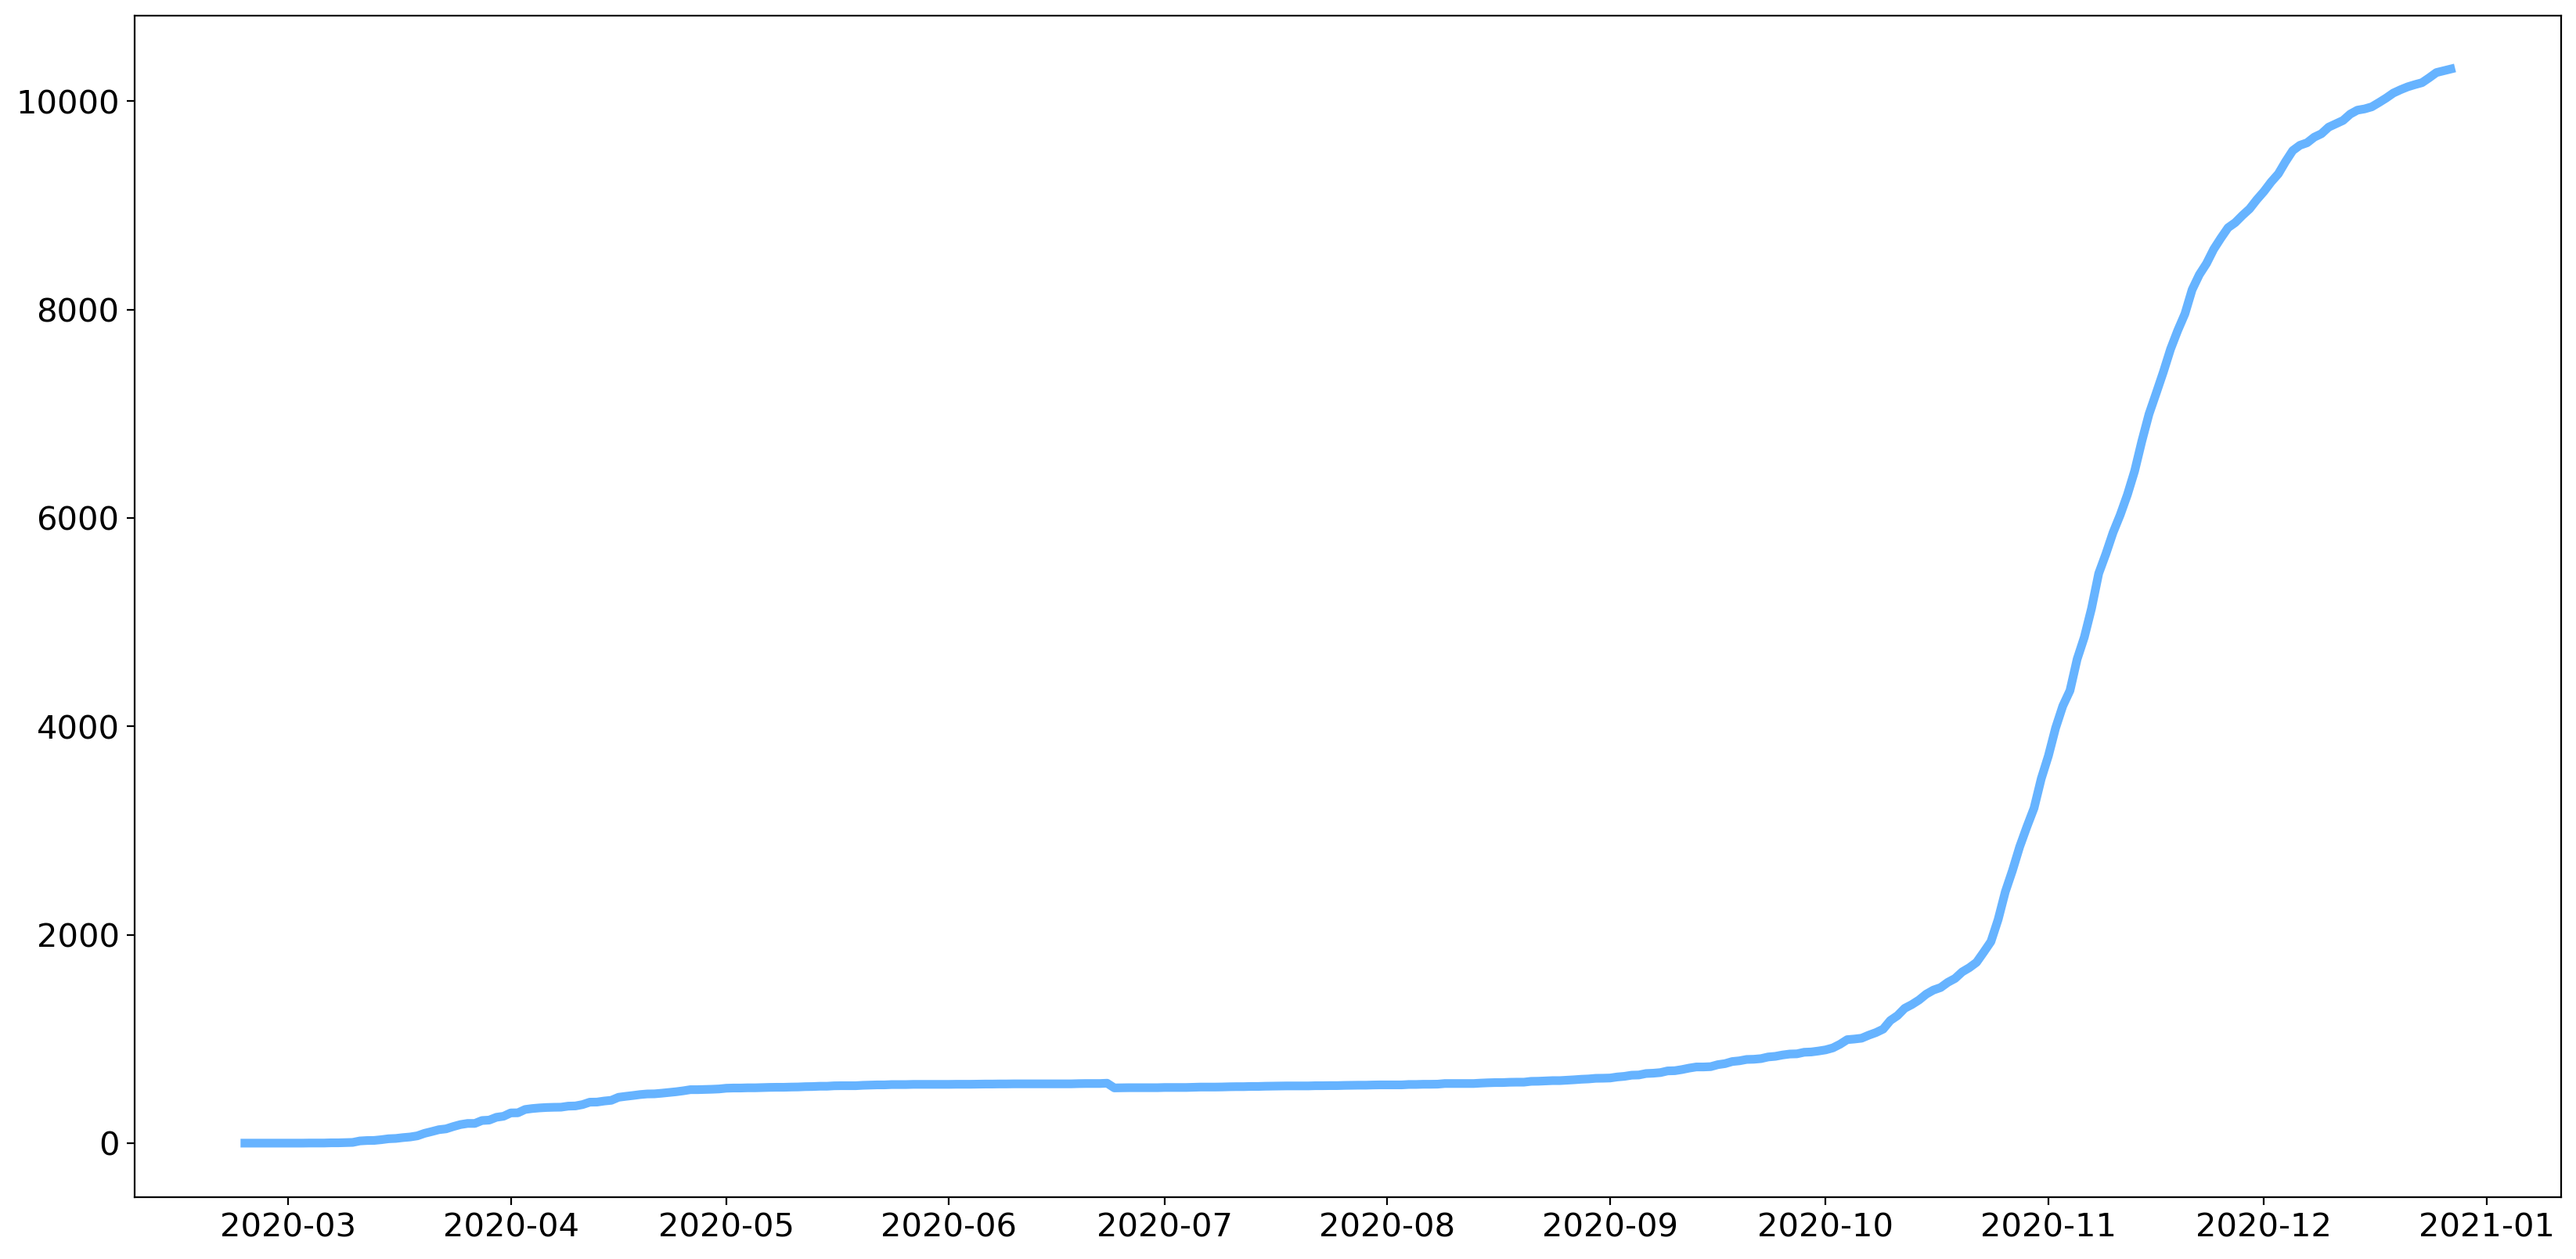

In [51]:
def plt_cf(df, color):  
    plt.figure(figsize = (20,10), dpi = 200)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.plot(df['data'], df['totale_casi'], color = color, linewidth = 4)
    plt.show()
plt_cf(df_prato, "#66b3ff")

In [52]:
def casi_gior(df):
    casi = []
    for i in range(len(df)):
        if i == 0:
            casi.append(i)
        else:
            # modifcica dei dati
            if df['totale_casi'][i] - df['totale_casi'][i-1] >= 0:
                casi.append(df['totale_casi'][i] - df['totale_casi'][i-1])
            else:
                casi.append(0)
    # Inseriamo la nuova lista nel nostro dataframe
    df['casi_giornalieri'] = casi
    return df

#### Nella posizione numero 121 ci sono stati meno casi (cumulati) di quelli del giorno precedente. Dato non congruo.

# Casi Giornalieri

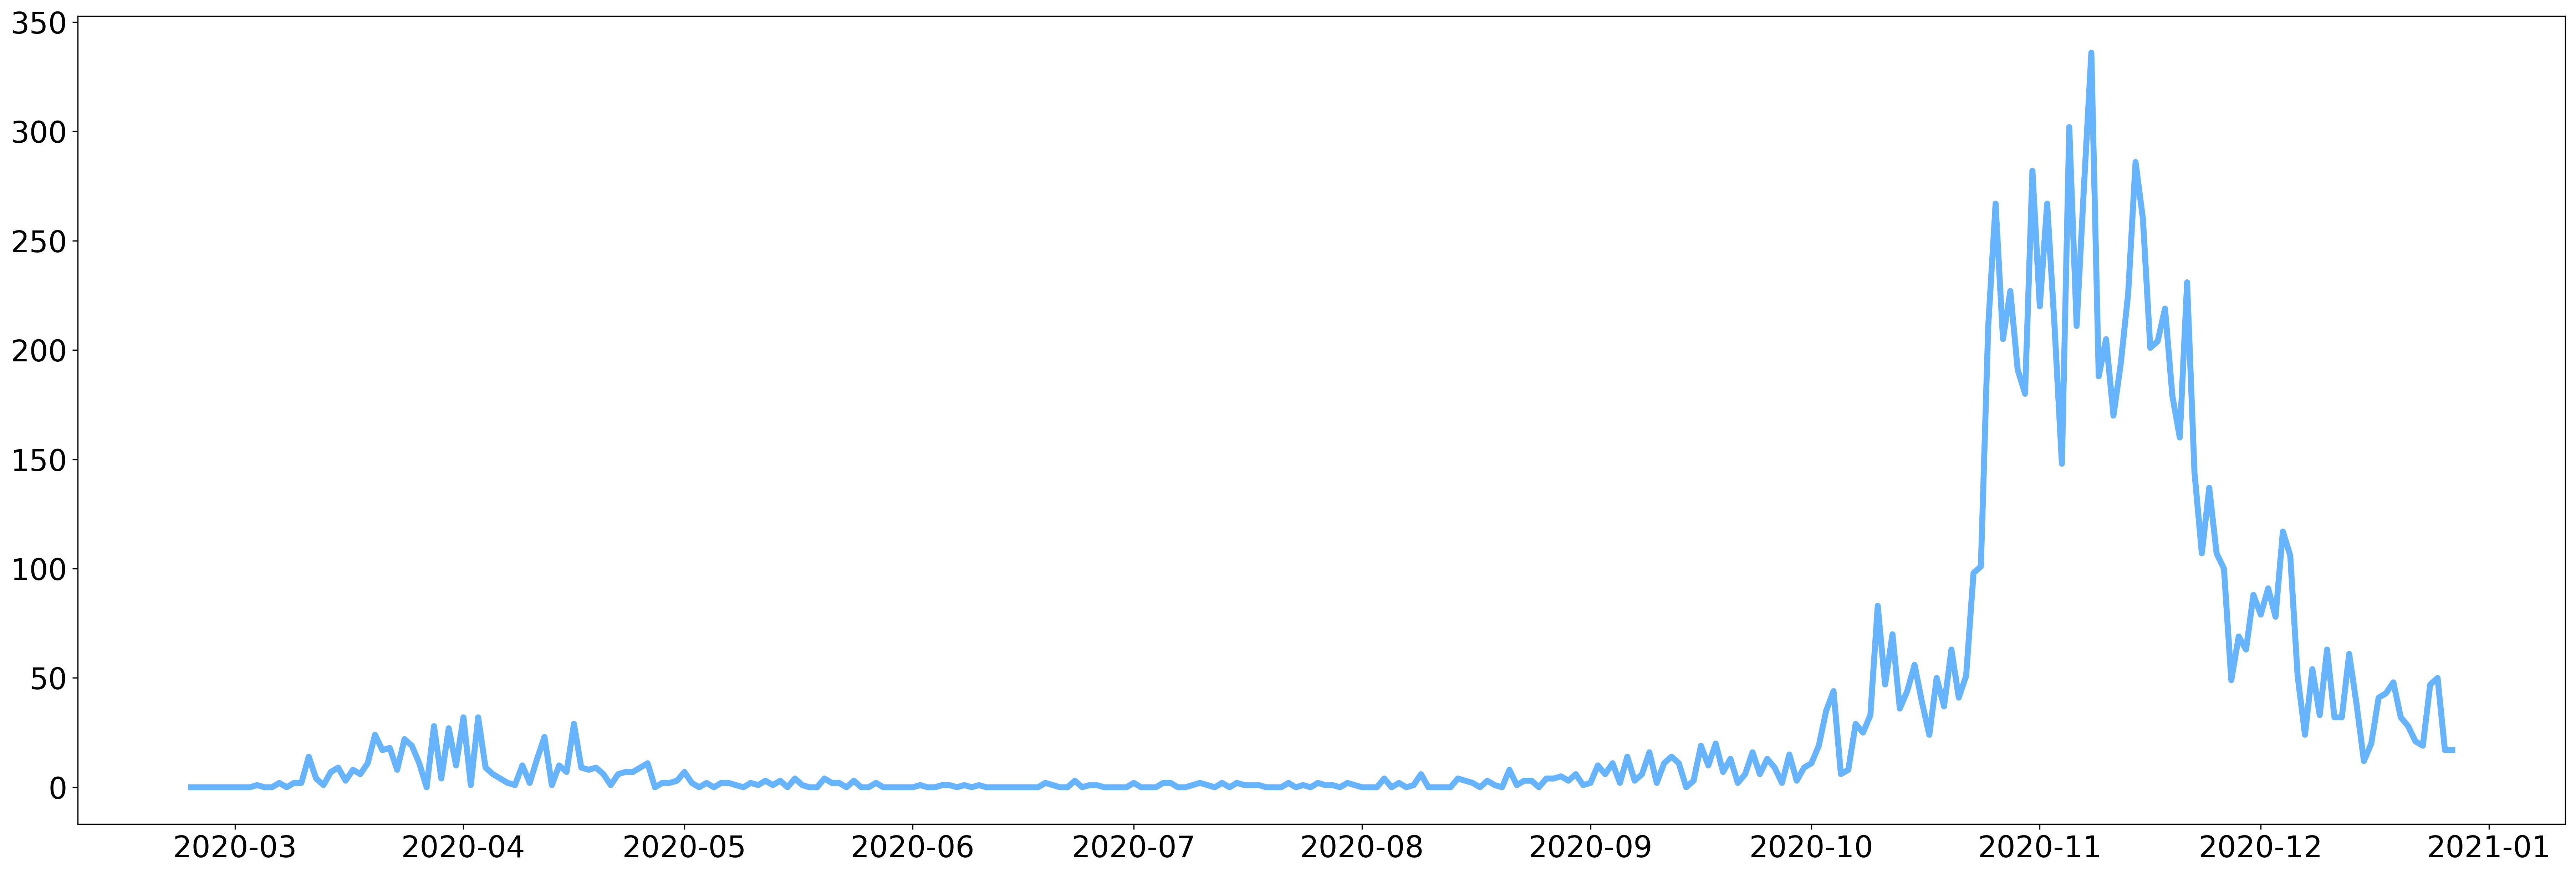

In [60]:
def casi_totali(df, color):    
    plt.figure(figsize = (30,10), dpi = 300)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.plot(df['data'], df['casi_giornalieri'], color = color, linewidth = 4)
    plt.show()
casi_totali(casi_gior(df_prato), "#66b3ff")

## Studio provincia di Firenze

In [61]:
df_firenze = df_province[df_province['denominazione_provincia'] == "Firenze"]
df_firenze.reset_index(inplace = True)
df_firenze.drop("index", axis = 1, inplace = True)

### Somma Cumulativa

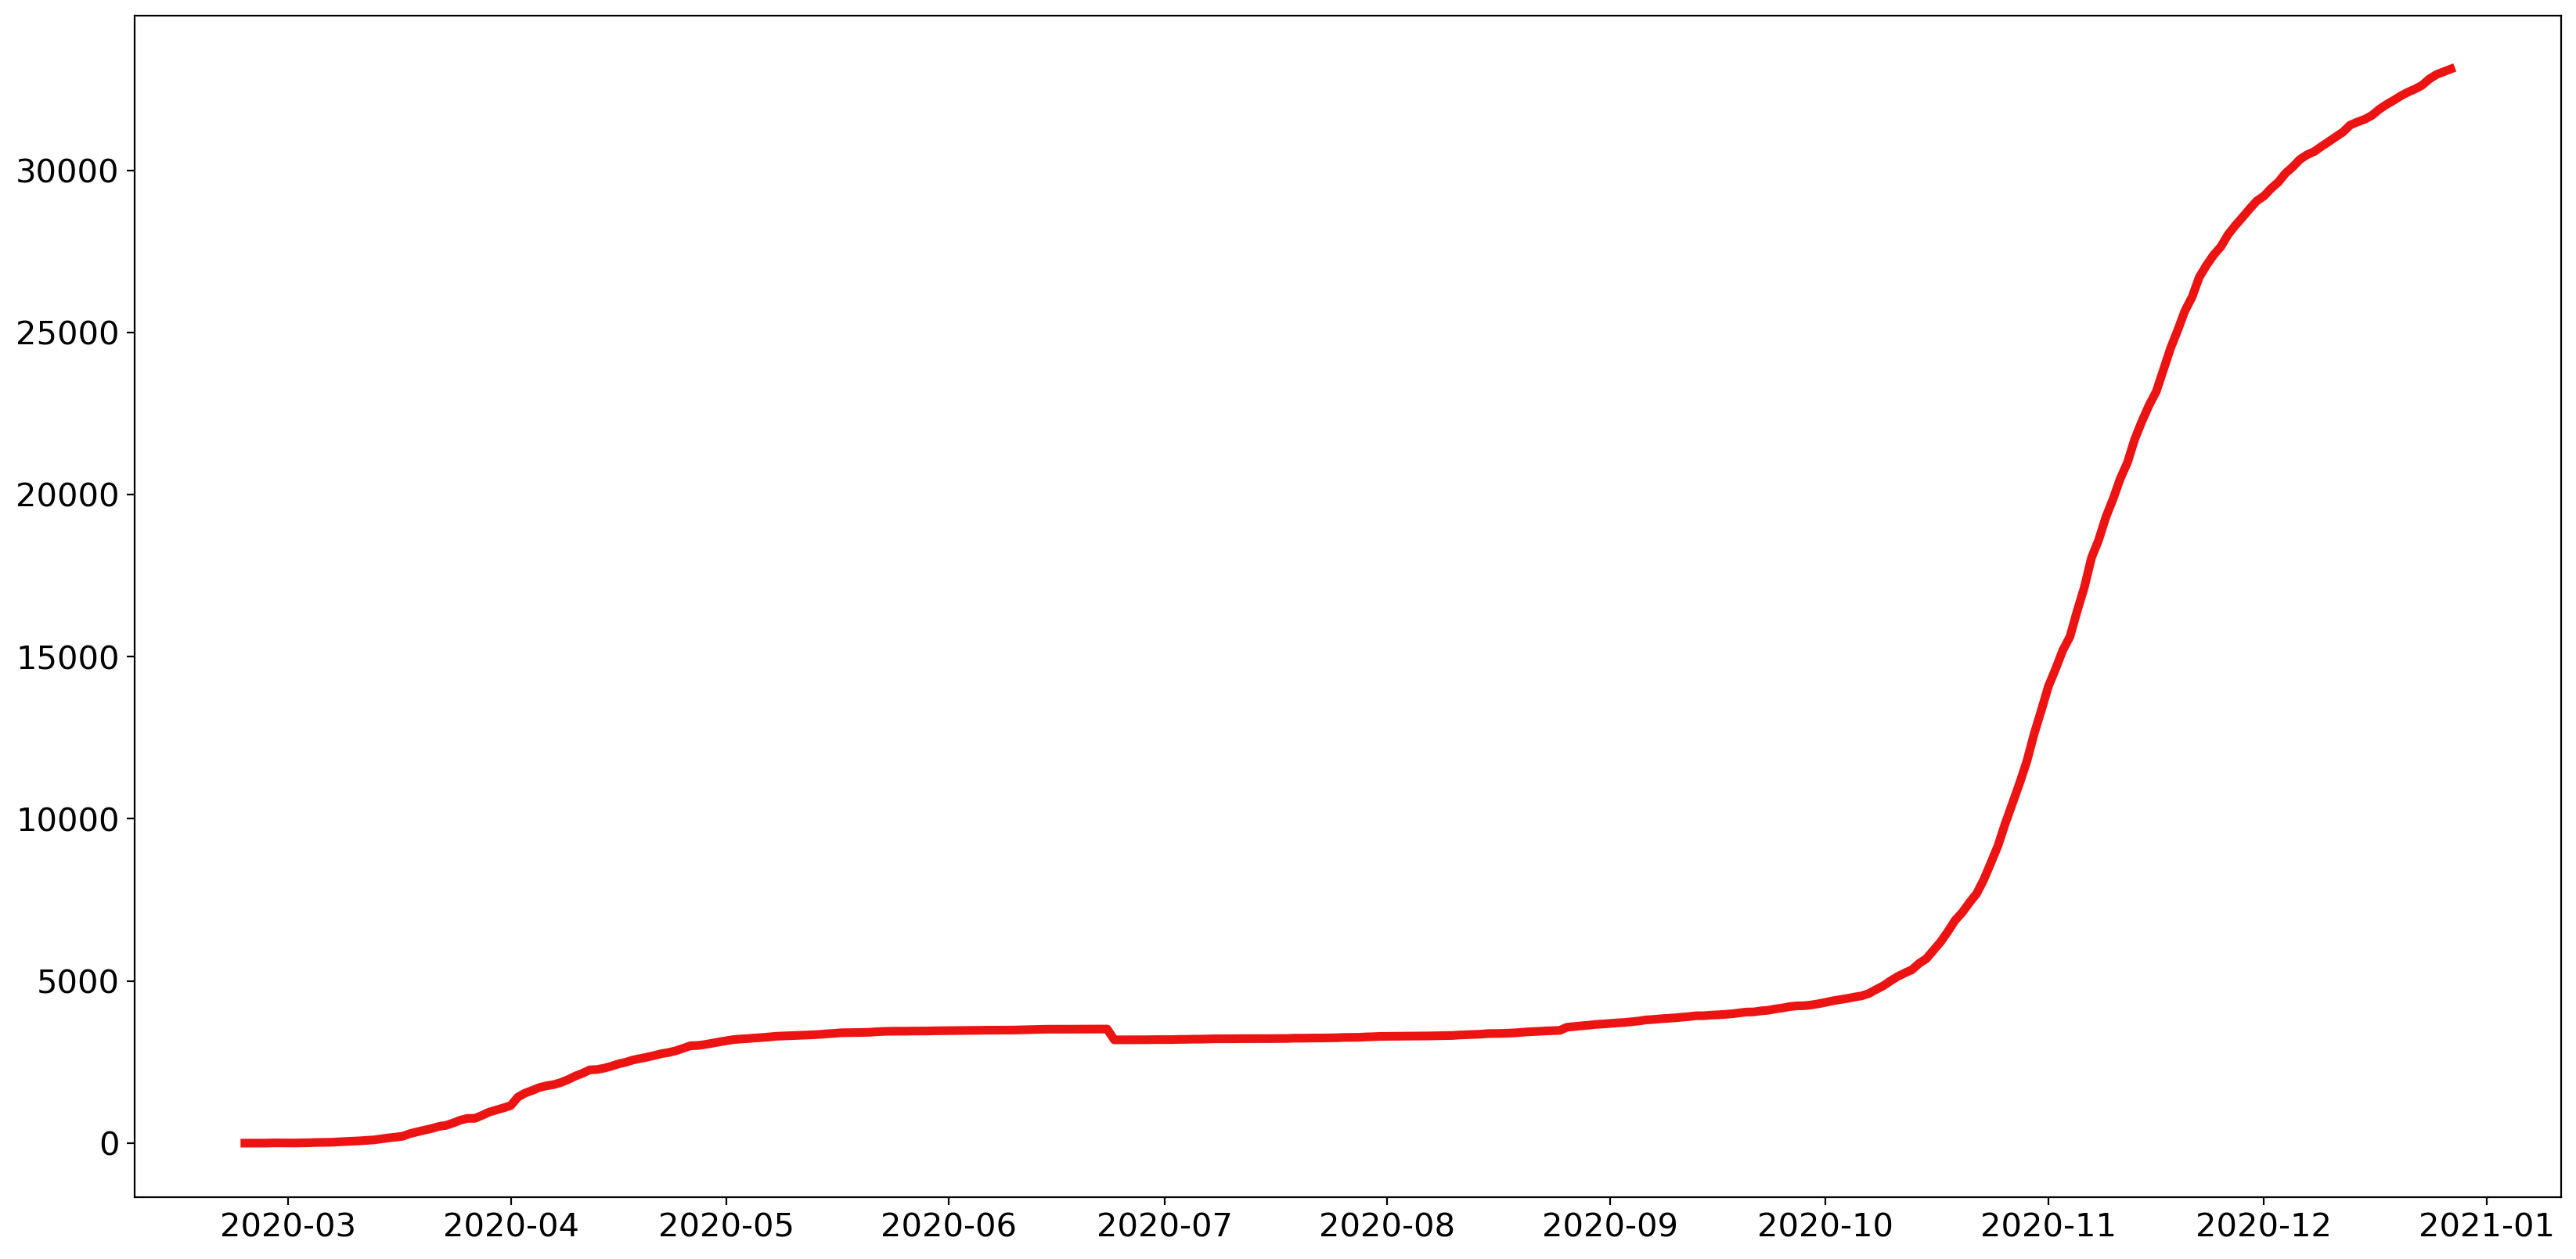

In [62]:
plt_cf(df_firenze, "#ec1313")

## Casi Giornalieri

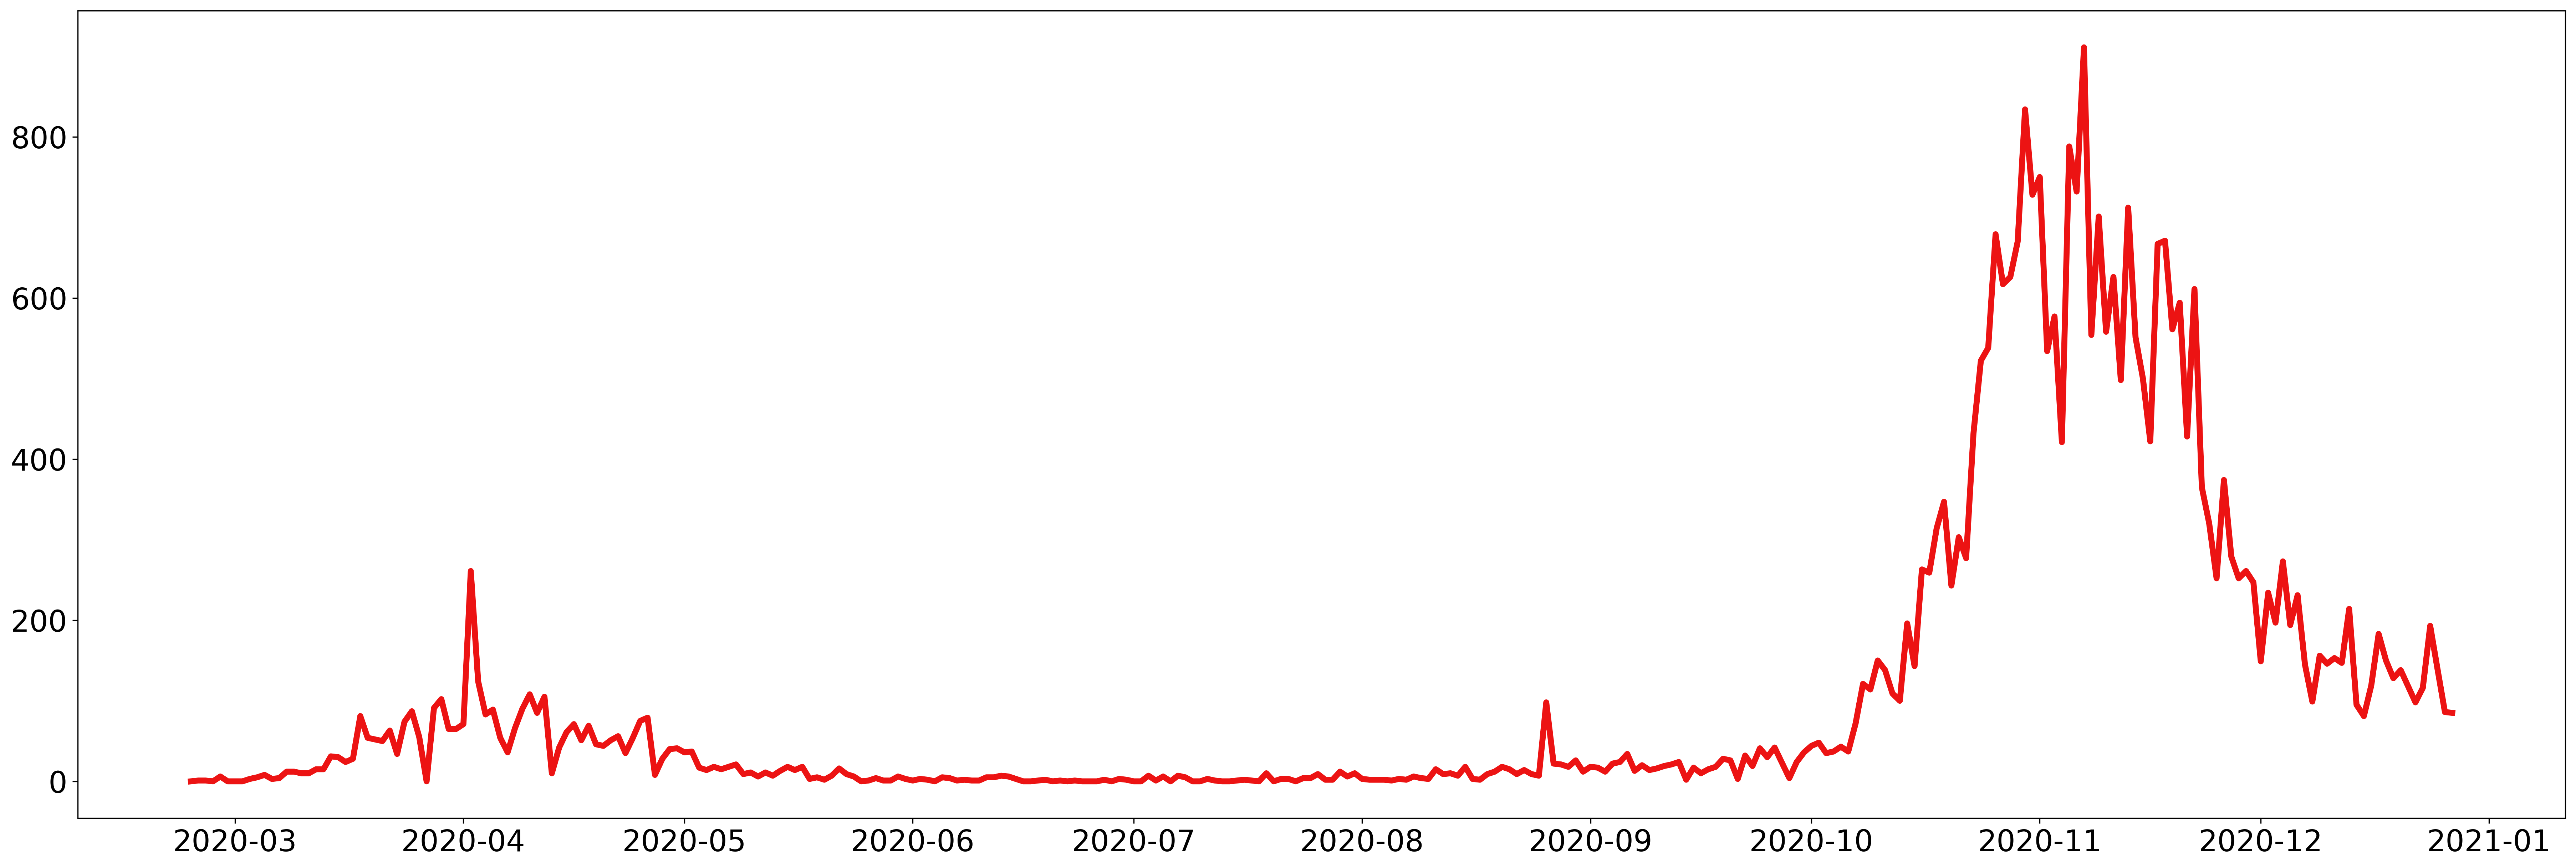

In [63]:
casi_totali(casi_gior(df_firenze), "#ec1313")

## Studio provincia di Pistoia

In [64]:
df_pistoia = df_province[df_province['denominazione_provincia'] == "Pistoia"]
df_pistoia.reset_index(inplace = True)
df_pistoia.drop("index", axis = 1, inplace = True)

### Somma Cumulativa

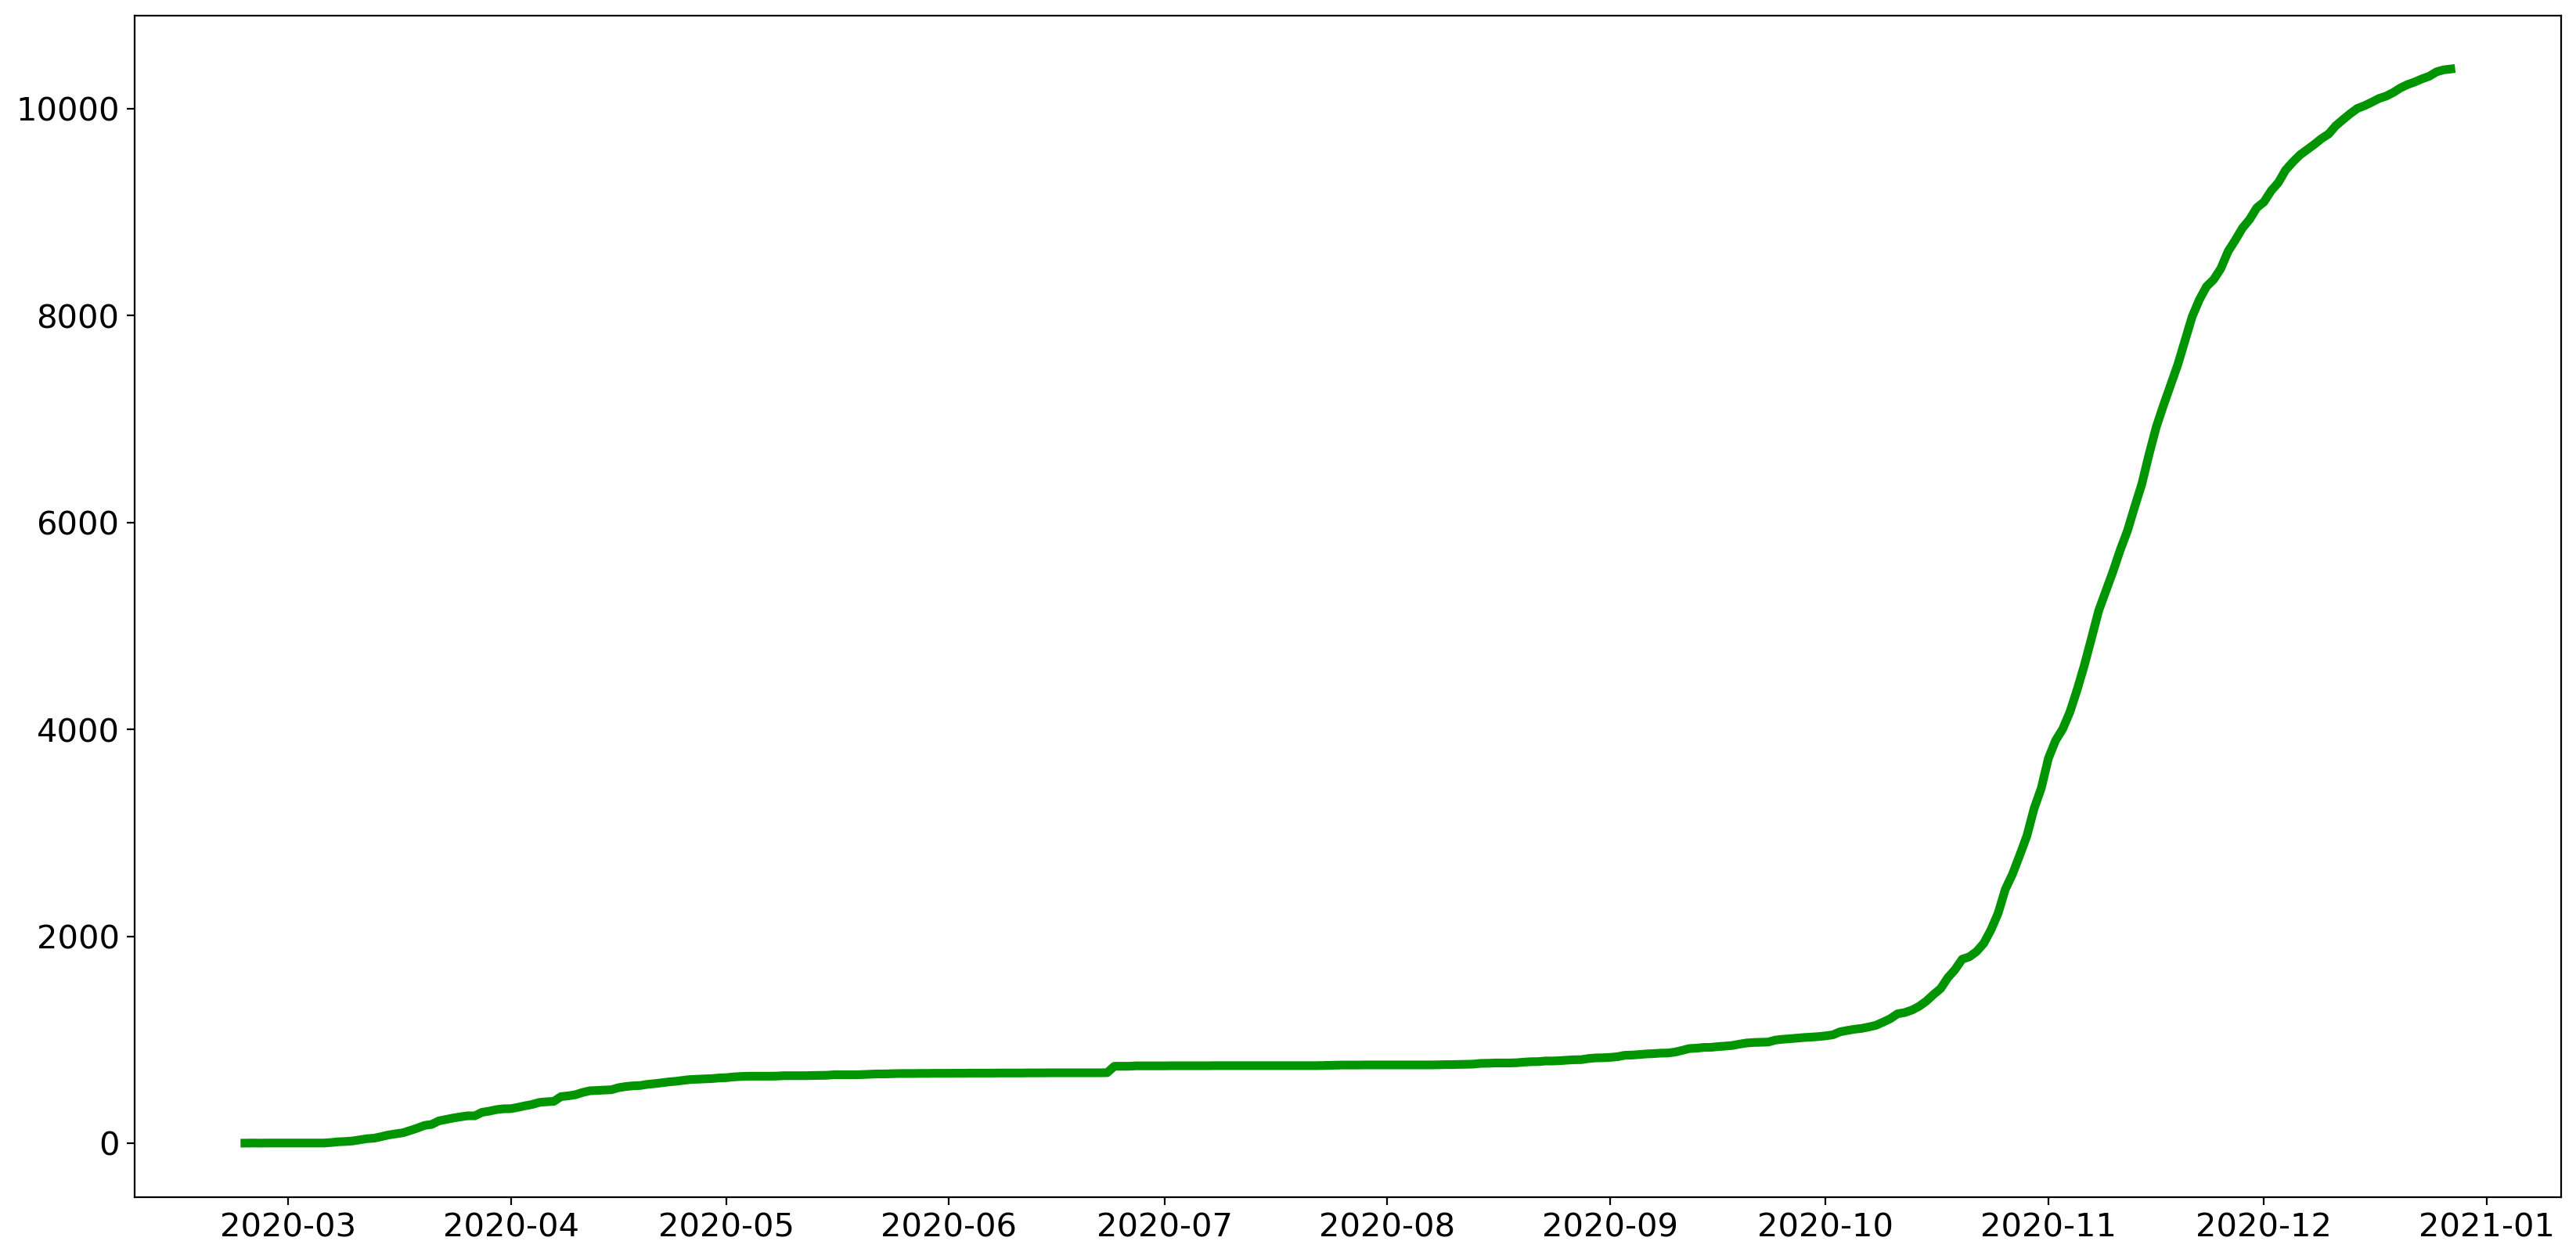

In [69]:
plt_cf(df_pistoia, "#009400")

## Casi Giornalieri

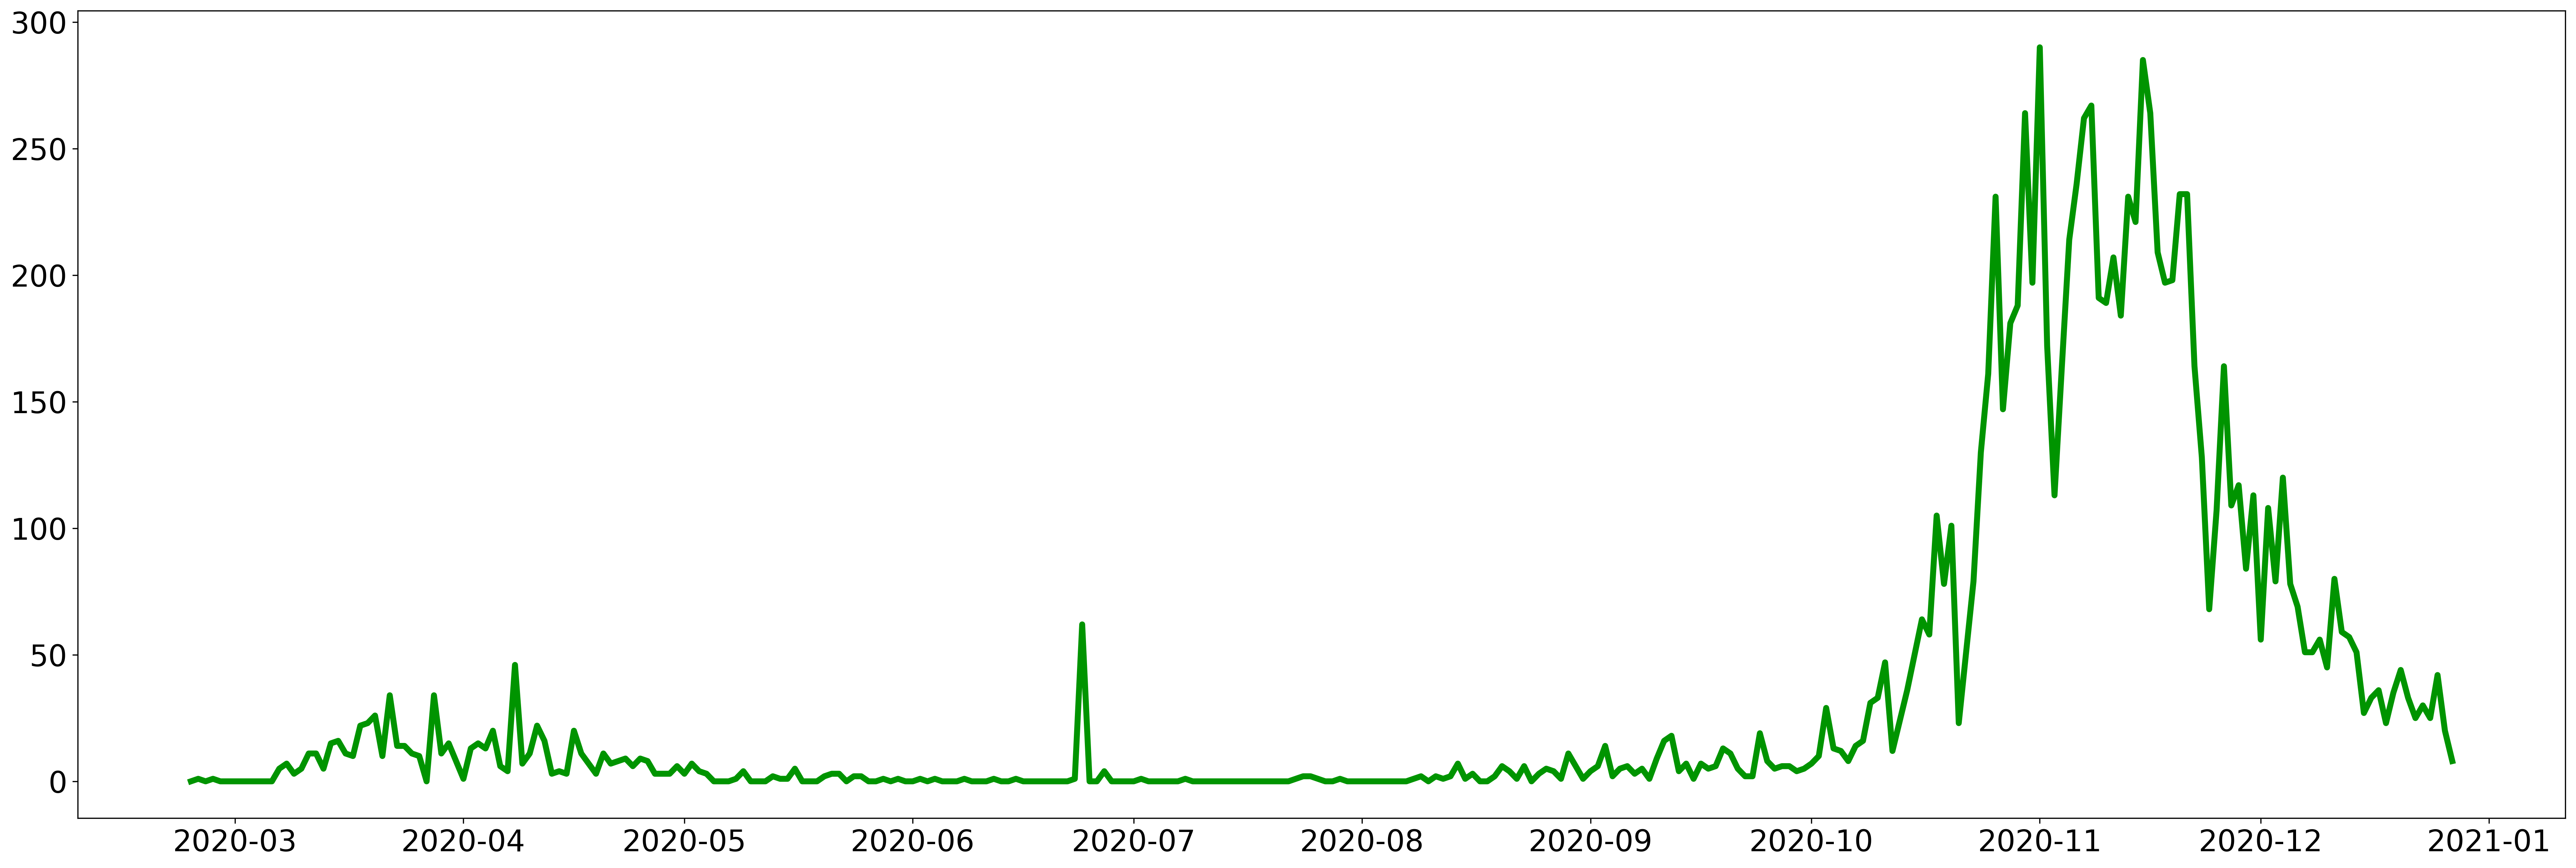

In [71]:
casi_totali(casi_gior(df_pistoia), "#009400")

# Prato/Firenze/Pistoia

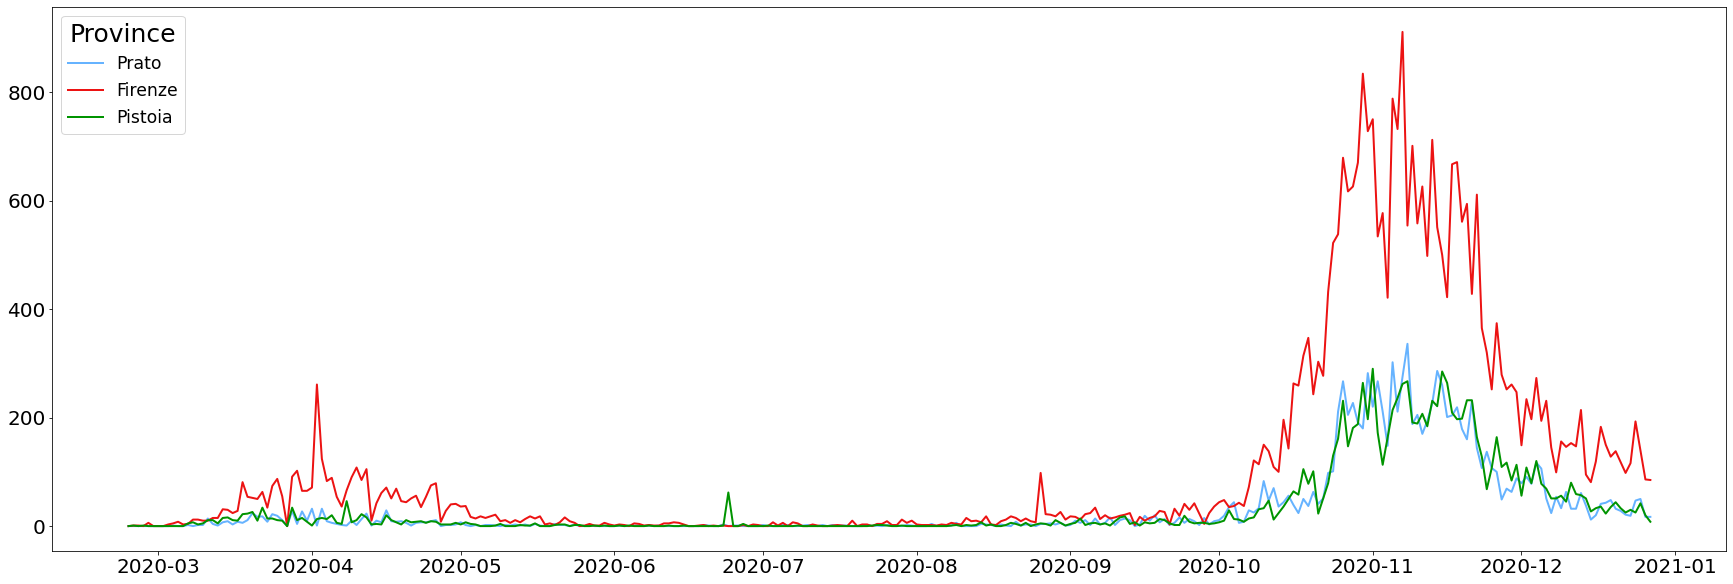

In [107]:
plt.figure(figsize = (30,10))
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.plot(df_prato['data'], df_prato['casi_giornalieri'], color = "#66b3ff", linewidth = 2, label = "Prato")
plt.plot(df_firenze['data'], df_firenze['casi_giornalieri'], color = "#ec1313", linewidth = 2, label = "Firenze")
plt.plot(df_pistoia['data'], df_pistoia['casi_giornalieri'], color = "#009400", linewidth = 2, label = "Pistoia")
plt.legend(loc = "upper left", fontsize = "xx-large", title = "Province", title_fontsize = 25)
plt.show()